In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import importlib_metadata
from shapely.geometry import Point, Polygon 
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs # MAPS!!!
import cartopy.feature as cfeature
import cartopy.io.shapereader as shp
import xarray as xr
import cartopy.io.img_tiles as cimgt
import matplotlib.font_manager as fm

In [2]:
ksp_fid = nc.Dataset('co3satarag_1975-2014_his.nc')
co3_fid = nc.Dataset('co3_1975-2014_his.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat = ksp_fid.variables['co3satarag'][:].squeeze()
co3 = co3_fid.variables['co3'][:].squeeze()

In [3]:
# just using the surface
surf_co3sat = co3sat[:,0,:,:]
surf_co3 = co3[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat = np.mean(surf_co3/surf_co3sat,axis=0)

# Argopecten irradians Maps

### Range of A. irradians

In [4]:
clat = np.append(ksp_fid.variables['lat_bnds'][:,0],ksp_fid.variables['lat_bnds'][-1,-1])
clon = np.append(ksp_fid.variables['lon_bnds'][:,0],ksp_fid.variables['lon_bnds'][-1,-1])

In [5]:
argo='A_irradians_range'
df=pd.read_csv(argo, delimiter=',') #,skipinitialspace=True) 
#df['Center Long']= df['Center Long'].astype(str)

#df['Center Lat']= (df['Center Lat']-df['Center Lat'].min()) / (df['Center Lat'].max() - df['Center Lat'].min())
#df['Center Long']= (df['Center Long']-df['Center Long'].min()) / (df['Center Long'].max() - df['Center Long'].min())

print(df)

     latitude  longitude
NaN      9.25      80.25
NaN      9.25      82.25
NaN      9.75     -75.75
NaN     10.25     -83.25
NaN     11.25     -70.25
..        ...        ...
NaN     42.25     -70.75
NaN     42.25     -71.25
NaN     42.75     -70.75
NaN     43.75     -70.25
NaN     44.75     -66.75

[106 rows x 2 columns]


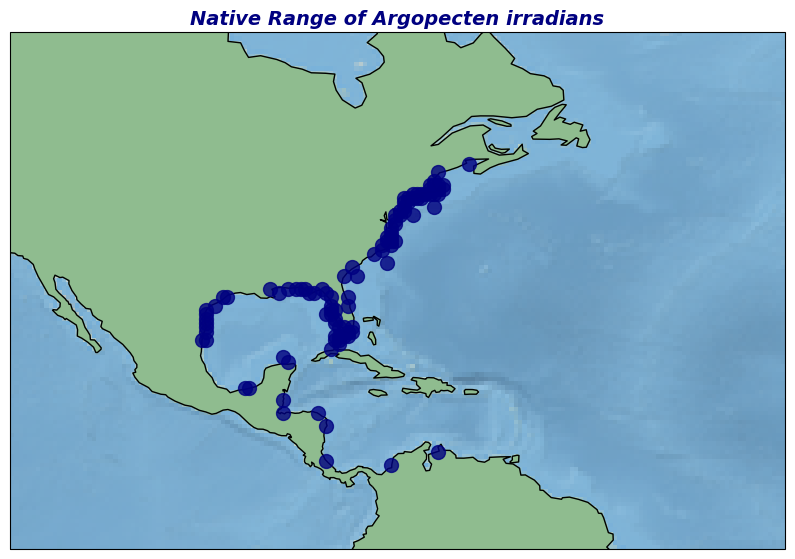

In [6]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.stock_img()
ax.set_extent(
    [-120, -30, 0, 60],
   crs=ccrs.PlateCarree())
plt.title('Native Range of Argopecten irradians', fontweight='bold', fontstyle='italic', color='navy', fontsize=14)

# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=100,
    alpha=0.8,zorder=14,
    transform=ccrs.PlateCarree())
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

## A. irradians & Arag. Sat. State 

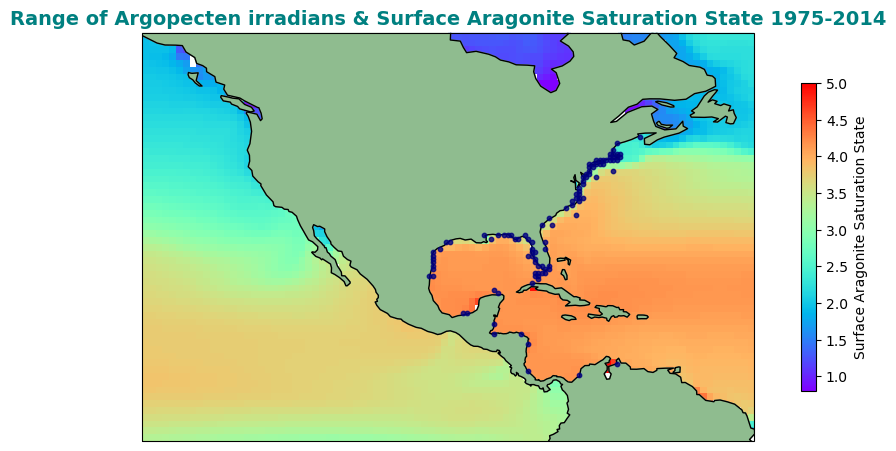

In [7]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.set_extent(
    [-140, -50, 0, 60],
    crs=ccrs.PlateCarree())

plt.title('Range of Argopecten irradians & Surface Aragonite Saturation State 1975-2014', fontweight='bold', fontsize=14, color='teal')
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=10,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

In [8]:
ksp_fid_proj = nc.Dataset('co3satarag_2061-2100_ssp585.nc')
co3_fid_proj = nc.Dataset('co3_2061-2100_ssp585.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat_proj = ksp_fid_proj.variables['co3satarag'][:].squeeze()
co3_proj = co3_fid_proj.variables['co3'][:].squeeze()

In [9]:
# just using the surface
surf_co3sat_proj = co3sat_proj[:,0,:,:]
surf_co3_proj = co3_proj[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat_proj = np.mean(surf_co3_proj/surf_co3sat_proj,axis=0)

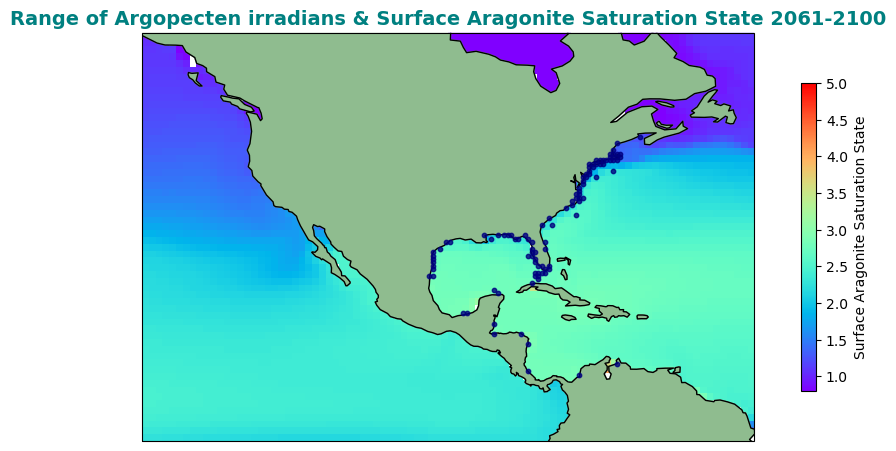

In [10]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.set_extent(
    [-140, -50, 0, 60],
    crs=ccrs.PlateCarree())

plt.title('Range of Argopecten irradians & Surface Aragonite Saturation State 2061-2100', fontweight='bold', fontsize=14, color='teal')
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=10,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat_proj,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

In [11]:
ksp_fid_pic = nc.Dataset('co3satarag_0101-0351_piC_ts.nc')
co3_fid_pic = nc.Dataset('co3_0101-0351_piC.nc')
# extract the variable from the netcdf file. 
# you can name it whatever you want but best to use something you can rememver
co3sat_pic = ksp_fid_pic.variables['co3satarag'][:].squeeze()
co3_pic = co3_fid_pic.variables['co3'][:].squeeze()

OSError: [Errno -101] NetCDF: HDF error: 'co3_0101-0351_piC.nc'

In [12]:
# just using the surface
surf_co3sat_pic = co3sat_pic[:,0,:,:]
surf_co3_pic = co3_pic[:,0,:,:]

# calculating aragonite saturation state:
#    co3/co3sat = arag saturation state 
surf_arag_sat_pic = np.mean(surf_co3_pic/surf_co3sat_pic,axis=0)

NameError: name 'co3sat_pic' is not defined

NameError: name 'surf_arag_sat_pic' is not defined

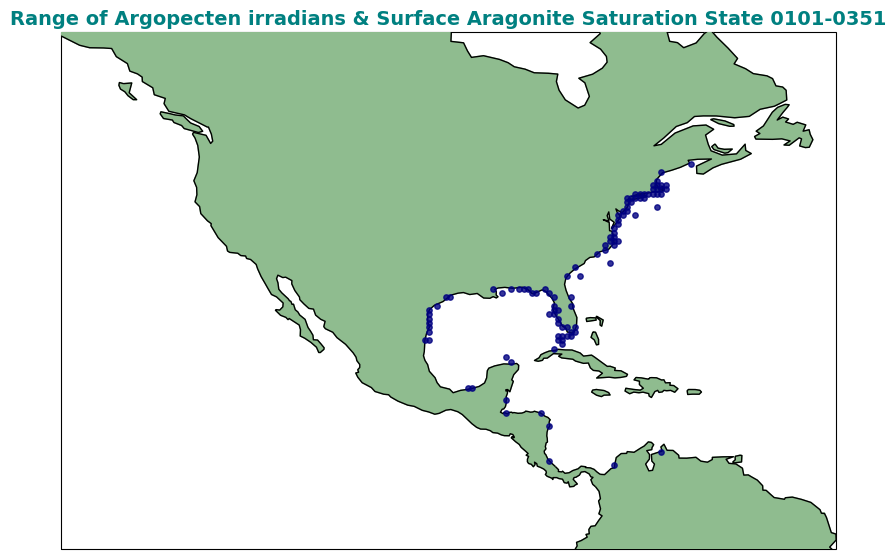

In [13]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.set_extent(
    [-140, -50, 0, 60],
    crs=ccrs.PlateCarree())

plt.title('Range of Argopecten irradians & Surface Aragonite Saturation State 0101-0351', fontweight='bold', fontsize=14, color='teal')
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=15,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat_pic,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

# Porites astreoides Maps

In [14]:
# Define the file path
pore='P_astreoides_range'

# Read the text file using pandas
df = pd.read_csv(pore, delimiter=' ', skipinitialspace=True)

# Display the DataFrame
print(df)

     latitude  longitude
0      -27.25     -48.25
1      -20.75     -33.75
2      -18.25     -38.75
3      -18.25     -39.25
4      -17.75     -38.75
..        ...        ...
220     29.75     -93.25
221     30.25     -86.75
222     32.25     -64.75
223     40.75     -72.25
224     54.25     -57.25

[225 rows x 2 columns]


## Porites astreoides Range

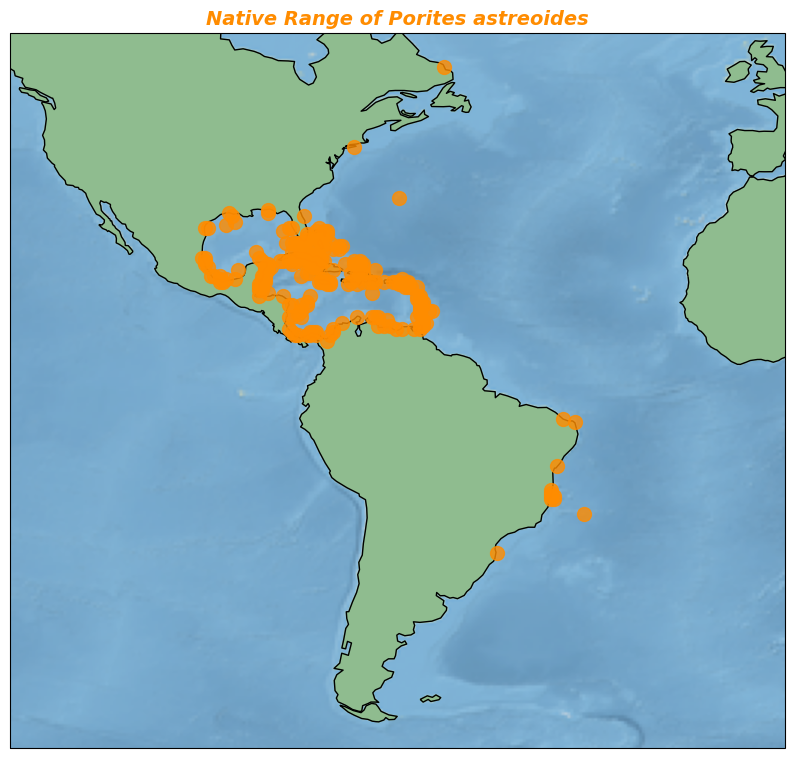

In [15]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.stock_img()
ax.set_extent(
    [-130, 0, -60, 60],
   crs=ccrs.PlateCarree())
plt.title('Native Range of Porites astreoides', fontweight='bold', fontstyle='italic', color='darkorange', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="darkorange",
    s=100,
    alpha=0.8,zorder=14,
    transform=ccrs.PlateCarree())
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

## Porites astreoides & Arag. Sat. State

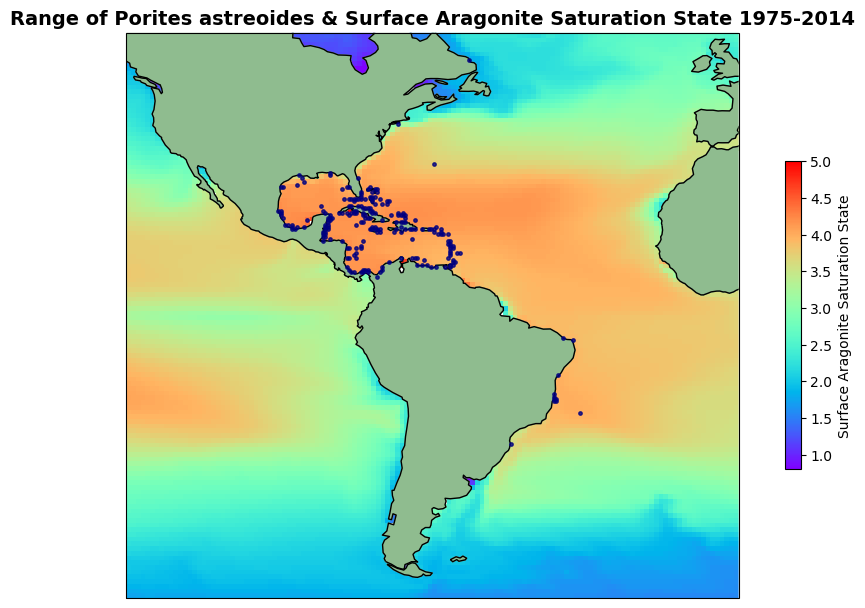

In [16]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.set_extent(
    [-130, 0, -60, 60],
    crs=ccrs.PlateCarree())

plt.title('Range of Porites astreoides & Surface Aragonite Saturation State 1975-2014',fontweight='bold', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=6,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

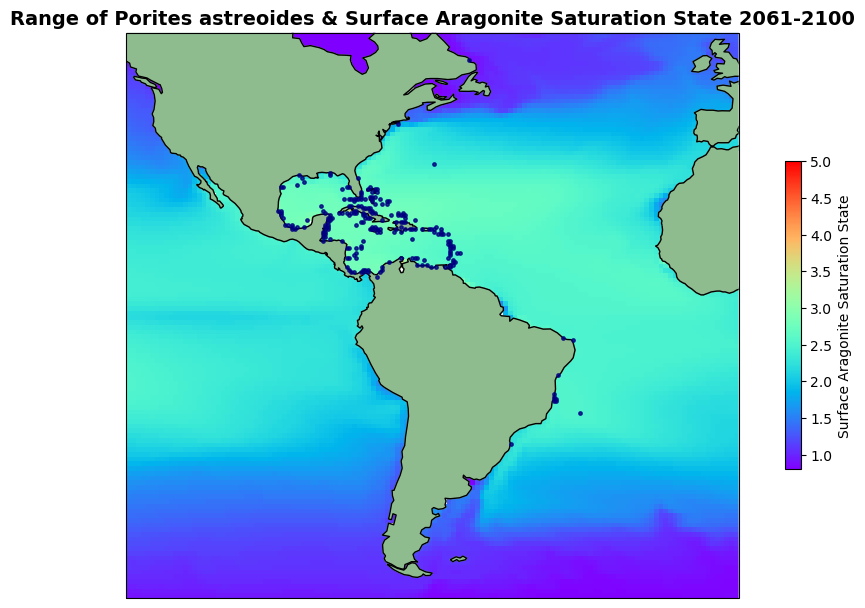

In [17]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.set_extent(
    [-130, 0, -60, 60],
    crs=ccrs.PlateCarree())

plt.title('Range of Porites astreoides & Surface Aragonite Saturation State 2061-2100',fontweight='bold', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=6,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat_proj,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

NameError: name 'surf_arag_sat_pic' is not defined

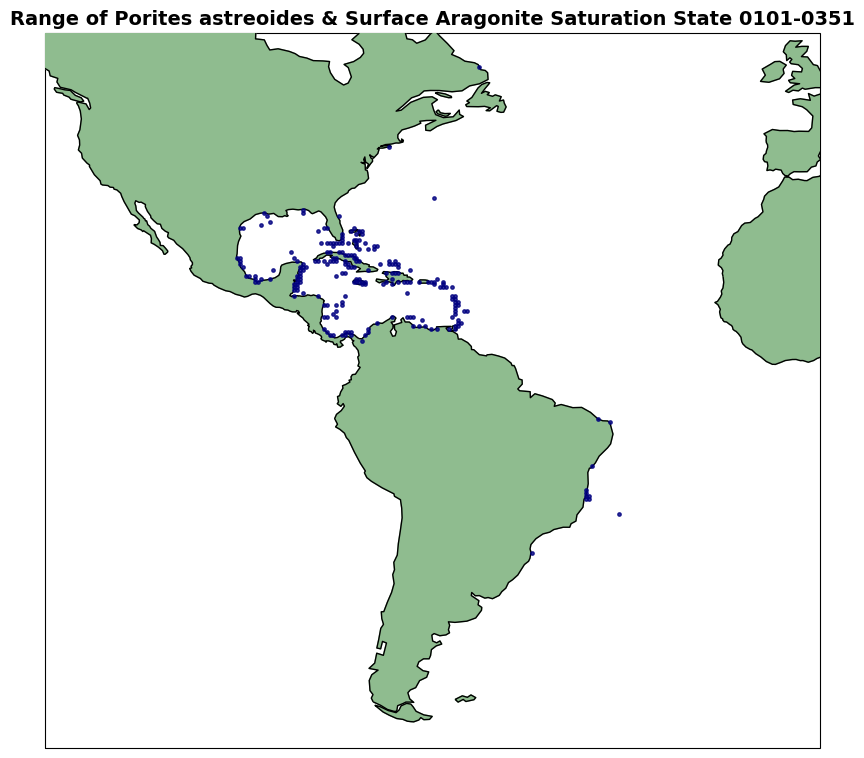

In [18]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.set_extent(
    [-130, 0, -60, 60],
    crs=ccrs.PlateCarree())

plt.title('Range of Porites astreoides & Surface Aragonite Saturation State 0101-0351',fontweight='bold', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=6,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat_pic,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

# Limacina helicina Maps

## Limacina helicina Range

In [19]:
# Define the file path
lima='L_helicina_range'

# Read the text file using pandas
df = pd.read_csv(lima, delimiter=' ', skipinitialspace=True)

# Display the DataFrame
print(df)

      latitude  longitude
0       -46.75     142.25
1       -46.75     146.25
2       -43.25     147.75
3       -40.25     -62.25
4       -29.25     114.75
...        ...        ...
1522     89.25      85.25
1523     89.25      -4.75
1524     89.25    -135.75
1525     89.25    -138.25
1526     89.75     -64.25

[1527 rows x 2 columns]


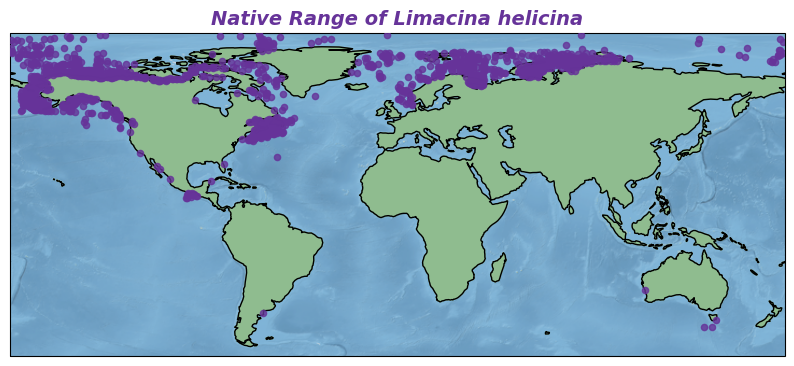

In [21]:
figure = plt.figure(figsize=(10,10))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')
ax.stock_img()

ax.set_extent(
    [-180, 180, -60, 190],
   crs=ccrs.PlateCarree())
plt.title('Native Range of Limacina helicina', fontweight='bold', fontstyle='italic', color='rebeccapurple', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="rebeccapurple",
    s=20,
    alpha=0.8,zorder=14,
    transform=ccrs.PlateCarree())
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

## L. helicina & Arag. Sat. State 

In [ ]:
figure = plt.figure(figsize=(13,13))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')  
ax.set_extent(
 [-180, 180, -60, 180],
   crs=ccrs.PlateCarree())

plt.title('Range of Limacina helicina & Surface Aragonite Saturation State 1975-2014', fontweight='bold', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=6,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()

In [ ]:
figure = plt.figure(figsize=(13,13))

ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, zorder=11)
ax.add_feature(cfeature.LAND, zorder=10, color='darkseagreen')  
ax.set_extent(
 [-180, 180, -60, 180],
   crs=ccrs.PlateCarree())

plt.title('Range of Limacina helicina & Surface Aragonite Saturation State 2061-2100', fontweight='bold', fontsize=14)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=df["longitude"],
    y=df["latitude"],
    color="navy",
    s=6,
    alpha=0.8,zorder=13,
    transform=ccrs.PlateCarree())
#plot surface data
P = ax.pcolormesh(clon,clat,surf_arag_sat_proj,vmin=.8,vmax=5,cmap='rainbow',
                  transform=ccrs.PlateCarree())
colorbar = plt.colorbar(P, ax=ax, orientation='vertical', shrink=0.4, pad=0.06)
colorbar.set_label('Surface Aragonite Saturation State')
plt.setp(ax.spines.values(), color='black', zorder=12)
plt.show()